In [16]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym # required to compute partial derivatives

import matplotlib.pyplot as plt
import matplotlib_inline
from IPython import display 
%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

***
***
# Parametric expreiments!

### Parametric experiment: An experiment in which specific parameters are varied to observe how they affect the outcome of a model or algorithm.
### Meta Parameters: Parameters that define how an optimization algorithm, such as gradient descent, behaves.
- examples - starting value, learning rate, training iterations / epochs
***

## The functions used in this experiment

- global minimum is around -1.4, with a local min at ~4.2

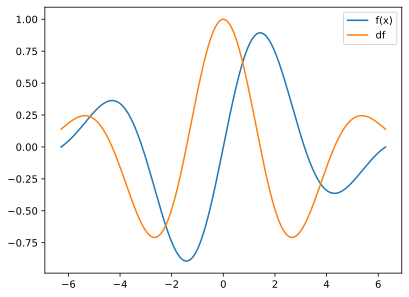

In [17]:
# function
x = np.linspace(-2*np.pi,2*np.pi,401) # (starting point, ending point, number of values)
y = np.sin(x)*np.exp(-x**2*0.05)

# derivative
dx = np.cos(x)*np.exp(-x**2*0.05) + np.sin(x)*(-0.1*x)*np.exp(-x**2*0.05)

# plot
plt.plot(x,y,x,dx)
plt.legend(['f(x)','df'])

***
#### Experiment 1: Varying the starting location:
- The starting location is systematically varied between -5 and +5 to see how it affects the model's performance.
- The final estimate of the function minimum is plotted against the initial starting locations.

In [18]:
# function
def fx(x):
    return np.sin(x)* np.exp(-x**2*0.05)

# derivative
def deriv(x):
    return np.cos(x)*np.exp(-x**2*0.05) - np.sin(x)*0.1*x*np.exp(-x**2*0.05)

<function matplotlib.pyplot.show(close=None, block=None)>

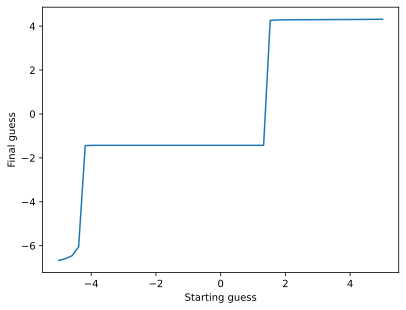

In [19]:
# Experiment 1: systematically varying starting point

# starting point
start_guess = np.linspace(-5,5,50)
final_guess = np.zeros(len(start_guess))

# gradient descent parameters
learning_rate = 0.01
epochs = 1000

# looping over starting points
for index, local_min in enumerate(start_guess):

    # training
    for i in range(epochs):
        gradient = deriv(local_min)
        local_min = local_min - learning_rate*gradient

    # store final guess
    final_guess[index] = local_min

# plot
plt.plot(start_guess, final_guess)
plt.xlabel('Starting guess')
plt.ylabel('Final guess')
plt.show

### Interpreting the results
1. When the parameters for starting guess are set to -5, 5 it can be seen that there are 2 "plateus" in this graph. There is one around -1.4 (global min), and one around 4 (local min). 
2. This experiment shows that for this particular function, using this particular algorithm, the range of (-4, 1.4) is the best range for the starting guess.
3. Knowing the ideal starting ranges can be used to avoid getting trapped in the local minima.

***
#### Experiment 2: Varying the learning rate:
- The learning rate is systematically varied from 10^-10 to 10^-1 in 50 steps.
- The gradient descent algorithm is run with different learning rates while keeping the starting guess fixed at zero.

<function matplotlib.pyplot.show(close=None, block=None)>

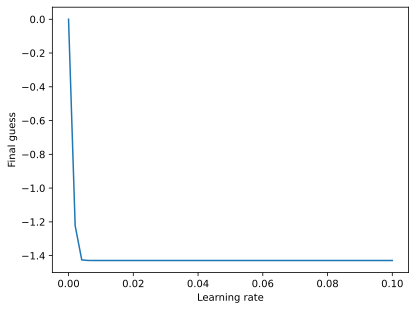

In [20]:
# Experiment 2 : systematically varying learning rate

# starting value, forced to start at 0 every time
local_min = 0

# learning parameters
learning_rates = np.linspace(1e-10, 1e-1, 50) # parameter being varied
final_result = np.zeros(len(learning_rates))
epochs = 1000 # held constant, same every run

# looping over values of learning rates
for index, learn_Rate in enumerate(learning_rates):
    
    # training
    for i in range(epochs):
        gradient = deriv(local_min)
        local_min = local_min - learn_Rate*gradient

    # store final guess for each epoch
    final_result[index] = local_min

# plot
plt.plot(learning_rates, final_result)
plt.xlabel('Learning rate')
plt.ylabel('Final guess')
plt.show

### Interpreting the results:
1. Looking at when the **learning rate is close to zero**, **the final guess for the minimum is almost the same as the initial guess** - 0. This means *no learning* would be happening.

2. If the learning **rate is to small the algorithm will not arrive at the correct answer because it takes too long**. There were *not enough epochs* because the steps were so small. This is generally for the range of $1x10^{-10}$ to 0.001 in this experiment. 

3. Past a certain point, making the **learning rate smaller does NOT change the result of the final guess**. That would be wasted resources and time. Anything from *(0.01, 0.09)* is overkill because *0.10 will give the same result for less granular steps* in this experiment for this function.

4. This can help **determine the optimal learning rate**, where you mostly get the right answer, but don't waste time with unnecessarily small steps in the gradient descent algorithm.

***
#### Experiment 3: Varying both learning rate and training epochs:
-  Multiple for loops are used to systematically vary both meta parameters.

In [21]:
# Experiment 3: changing learning rate and training epochs

# starting point (constant)
local_min3 = 0

# variable parameters
learning_rates3 = np.linspace(1e-10, 1e-1, 50)
training_epochs3 = np.round(np.linspace(10, 500, 40))

# initializing matrix to store results
final_results3 = np.zeros((len(learning_rates3), len(training_epochs3)))

# loop over learning rates
for lr_idx, learn_rate_value in enumerate(learning_rates3):

    # looping over training epochs
    for epoch_idx, train_epochs_value in enumerate(training_epochs3):
        
        # training
        local_min3 = 0
        for i in range(int(train_epochs_value)):
            gradient = deriv(local_min3)
            local_min3 = local_min3 - learn_rate_value*gradient

        # store final guess in matrix
        final_results3[lr_idx,epoch_idx] = local_min3

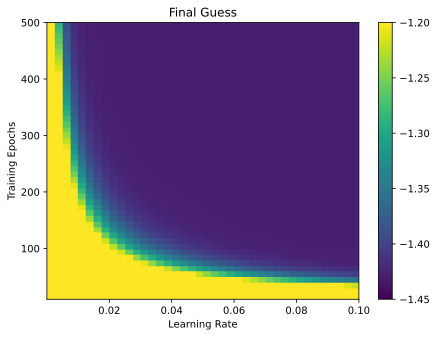

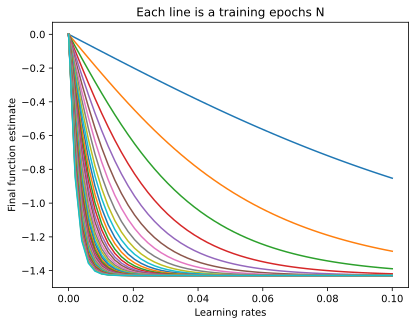

In [22]:
# plot

fig,ax = plt.subplots(figsize=(7,5))

# plot declaration
plt.imshow(final_results3, extent=[learning_rates3[0],learning_rates3[-1], training_epochs3[0], training_epochs3[-1]],
            aspect='auto', origin='lower', vmin=-1.45, vmax=-1.2)

# plot labels
plt.xlabel('Learning Rate')
plt.ylabel('Training Epochs')
plt.title('Final Guess')
plt.colorbar()
plt.show()

# additional plot
plt.plot(learning_rates3,final_results3)
plt.xlabel('Learning rates')
plt.ylabel('Final function estimate')
plt.title('Each line is a training epochs N')
plt.show()

### Interpreting the results:
1. In the first plot, each box represents the final guess for each epoch / iteration of the g.d. algorithm.
2. Each box is color coded to the value of the minimum guess. This graph shows that there are two different ways to get a decent result for the final minimum guess.
    a. Have a large amount of epochs with a smaller learning rate.
    b. Use fewer epochs with a larger learning rate.

### Interpreting results of second graph:
1. This graph is every row in the result matrix plotted out as a separate line. The bottom line around -1.4 is the correct result. The other points on the line are an incorrect result.
2. Not very interpretable with this experiment.
